<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chap 07. 군집화**

### **01. K-평균 알고리즘 이해**
  - K-평균은 군집화에서 가장 일반적으로 사용되는 알고리즘
  - 정의
    - 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

  - 프로세스

    1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다. 전체 데이터를 2개로 군집화하려면, 2개의 중심을 임의의 위치에 가져다 놓는다. (초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓는 것이 가장 이상적)
    2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다. 위 그림에서는 A, B 데이터가 같은 중심점에 소속되며, C,E,F 데이터가 같은 중심점에 소속된다.
    3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다. 위 그림에서는 A, B 데이터 포인트의 평균 위치로 중심점이 이동했고, 다른 중심점 역시 C,E,F 데이터 포인트의 평균 위치로 이동했다. 
    4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경한다. 위 그림에서는 C 데이터가 기존의 중심점보다 더 가까운 중심점으로 변경되었다.
    5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다. 위 그림에서는 데이터 C가 중심 소속이 변경되면서 두 개의 중심이 모두 이동한다.
    6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없다면 군집화를 종료한다. 그렇지 않다면 다시 4번의 과정을 가쳐 소속을 변경하고 이 과정을 반복한다.
  
  - K-평균의 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
  
  - K-평균의 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음)
    - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느림
    - 몇 개의 군집(cluster)을 선택해야 할 지 가이드하기 어려움

#### a. 사이킷런 KMeans 클래스 소개
  - 주요 파라미터
    - `n_clusters`
      - 군집화할 개수, 즉 군집 중심점의 개수 
    - `init`
      - 초기에 군집 중심점의 좌표를 설정할 방식
      - 보통은 임의로 중심을 설정하지 않고 k-means++ 방식으로 최초 설정
    - `max_iter`
      - 최대 반복 횟수
      - 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

  - 주요 속성 정보
    - 사이킷런의 비지도학습 클래스와 마찬가지로 fit() 또는 fit_transform() 메서드를 이용해 수행
    - `labels_`
      - 각 데이터 포인트가 속한 군집 중심점 레이블
    - `cluster_centers_`
      - 각 군집 중심점 좌표(shape = [군집 개수, 피처 개수])
      - 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능

#### b. K-평균을 이용한 붓꽃 데이터 세트 군집화

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> 붓꽃 데이터 세트를 3개 그룹으로 군집화해보자. 

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
# kmeans의 labels_를 이용해 각 데이터가 어떤 중심에 속하는지 확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


> 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 확인해보자.

In [6]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


  - 타깃값이 0인 데이터는 모두 1번 군집으로 잘 그루핑되었다.
  - 타깃값이 1인 데이터는 2개만 2번 군집으로 그루핑되고, 나머지는 모두 0번 군집으로 그루핑되었다.
  - 타깃값이 2인 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑되었다.

> 이번에는 붓꽃 데이터 세트의 군집화를 시각화해보자. 2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현하기 위해, 붓꽃 데이터 세트의 속성을 4개에서 2개로 차원 축소한 뒤에 표현해보자.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


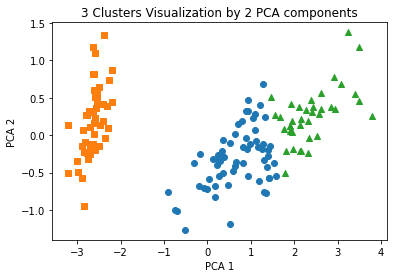

In [8]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출
plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA components')
plt.show()

  - Cluster 1을 나타내는 네모는 명확히 다른 군집과 잘 분리되었다.
  - Cluster 0을 나타내는 동그라미와 Cluster 2를 나타내는 세모는 상당 수준 분리되어 있지만, 네모만큼 명확하게는 분리되어 있지 않다.

#### c. 군집화 알고리즘 테스트를 위한 데이터 생성
  - 군집화용 데이터 생성기 - `make_blobs()`, `make_classification()`
    - `make_blobs()`
      - 주요 파라미터
        - n_samples
          - 생성할 총 데이터의 개수, 디폴트는 100
        - n_features
          - 데이터의 피처 개수
        - centers
          - int로 설정하면 군집의 개수
          - ndarray로 설정할 경우 개별 군집 중심점의 좌표를 의미
        - cluster_std
          - 생성될 군집 데이터의 표준 편차

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [11]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


> make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인해보자. 

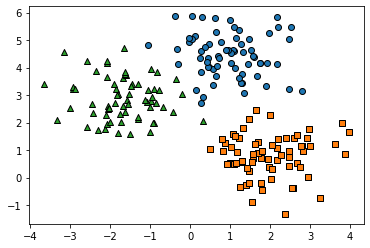

In [12]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target = 0, target = 1, target = 2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target'] == target]
  plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k',
              marker = markers[target])
  
plt.show()  

> 이번에는 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화해보자.

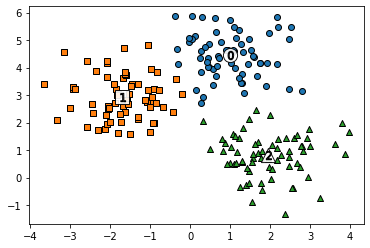

In [14]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
  center_x_y = centers[label]
  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k',
              marker = markers[label])
  
  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white',
              alpha = 0.9, edgecolor = 'k', marker = markers[label])
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'white', edgecolor = 'k',
              marker = '$%d$' % label)

plt.show()

In [15]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


  - target 0이 cluster label 0으로, target 1이 label 2로, target 2가 label 1로 거의 대부분 잘 매핑되었다.

---

### **02. 군집 평가(Cluster Evaluation)**

#### a. 실루엣 분석의 개요
  - 실루엣 분석은 군집화의 성능을 평가하는 대표적인 방법
  - 정의
    - 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타내는 지표
    - 효율적으로 잘 분리되었다는 것은 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 가깝게 붙어있다는 의미
    - 따라서 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있음
  
  - 실루엣 계수
    - 개별 데이터가 가지는 군집화 지표로, 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타냄
    - 계산
      - 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산
$$s(i) = \frac{b(i) - a(i)}{max (a(i),  b(i))}$$
      - 실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 의미

  - 좋은 군집화가 되기 위한 조건
    - 1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0 ~ 1사이의 값을 가지며, 1에 가까울수록 좋다.
    - 2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.

#### b. 붓꽃 데이터 세트를 이용한 군집평가
  - `silhouette_samples()`, `silhouette_score()`를 이용

In [16]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head()

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


  - 평균 실루엣 계수 값이 약 0.553이다. 
  - 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내는데, 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문에 위와 같은 결과가 나타난다.

> 군집별 평균 실루엣 계수 값을 알아보자.

In [17]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

  - 1번 군집은 평균 값이 약 0.80인데 반해, 0번은 약 0.42, 2번은 약 0.45로 상대적으로 평균값이 1번에 비해 낮다.

#### c. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [19]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

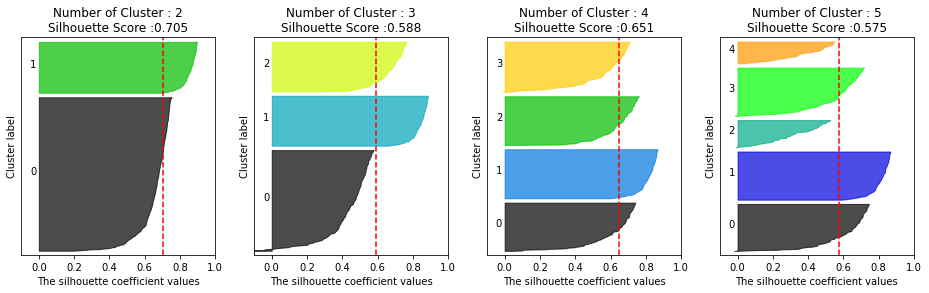

In [21]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1,
                  center_box = (-10.0, 10.0), shuffle = True, random_state = 1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

  - 앞에서 소개한 방와 마찬가지로 4개의 군집일 때 가장 최적임을 알 수 있다. 

> 이번에는 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수를 알아보자.

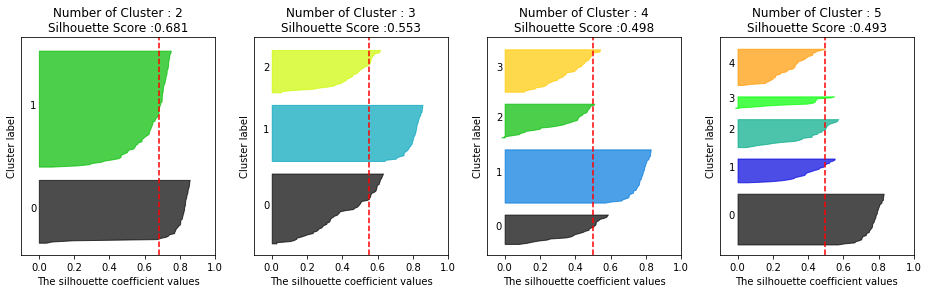

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

  - 붓꽃 데이터를 K-평균으로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아보인다.
  - 3개의 경우 평균 실루엣 계수 값도 2개보다 작을 뿐더러 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 크다.

---

### **03. 평균 이동**

#### a. 평균 이동(Mean Shift)의 개요
  - 정의
    - K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행
    - K-평균과 달리 평균 이동은 중심을 데이터가 모여 있는 `밀도가 가장 높은 곳으로 이동`시킴
    - 가장 집중적으로 데이터가 모여 있어 확률 밀도 함수가 피크인 점을 군집 중심점을오 선정하며, 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE(Kernel Density Estimation)를 이용
  
  - 장점
    - 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않으므로 좀 더 유연한 군집화가 가능함
    - 이상치의 영향력도 적으며, 미리 군집의 개수를 정하지 않아도 됨

  - 단점
    - 알고리즘의 수행 시간이 오래 걸림
    - bandwidth의 크기에 따른 군집화 영향도가 매우 큼

  - 프로세스
      
      1. 개별 데이터들의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Shift 알고리즘으로 계산
      2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
      3. 모든 데이터를 1~2까지 수행하면서 데이터를 이동. 개별 데이터들이 군집 중심점으로 모임
      4. 지정된 반복 횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화 수행
      5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설정 

  - KDE(Kernel Density Estimation)
    - 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
    - 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용됨
    - KDE는 다음과 같은 커널 함수식으로 표현
$$KDE = \frac{1}{n} K_{h}(x-x_{i}) = \frac{1}{nh}Σ_{i=1}^n K(\frac{x-x_{i}}{h})$$
      - K: 커널 함수
      - x: 확률 변숫값
      - xi: 관측값
      - h: 대역폭
  
  - 대역폭 h
    - KDE 형태를 부드러운 형태로 평활화하는 데 적용되며, h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능이 크게 좌우됨
    - h값이 작으면 과적합(over-fitting)이 쉬움
    - h값이 크면 과소적합(under-fitting)이 쉬움 
    - 따라서 적절한 KDE의 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에서 매우 중요

  - `MeanShift` 클래스
    - 주요 파라미터 
      - `bandwidth`
        - KDE의 대역폭 h와 동일
      - `estimate_bandwidth()`
        - 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치므로, 최적의 대역폭 계산을 위해 사용되는 함수

In [23]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


  - 군집이 0부터 5까지 총 6개로, 지나치게 세분화돼 군집화되었다.

> bandwidth를 살짝 높은 1.0으로 해서 MeanShift를 수행해보자.

In [24]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


  - 3개의 군집으로 잘 군집화되었다.

> MeanShift에서는 bandwidth를 최적화 값으로 설정하는 것이 매우 중요하므로, estimate_bandwidth() 함수를 이용해 최적화된 bandwidth 값을 찾아보자.

In [25]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [26]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


> 구성된 3개의 군집을 시각화해보자.

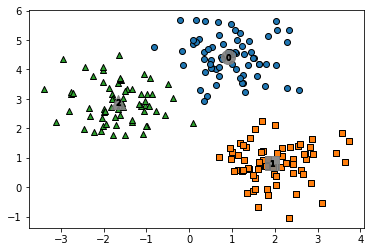

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])

  # 군집별 중심 표현
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'gray', alpha = 0.9,
              marker = markers[label])
  plt.scatter(x = center_x_y[0], y = center_x_y[1], color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

> target 값과 군집 label 값을 비교해보자.

In [28]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


  - target 값과 군집 label 값이 1:1로 잘 매칭되었다.

---

### **04. GMM(Gaussian Mixture Model)**

#### a. GMM(Gaussian Mixture Model) 소개
  - 정의
    - 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
    - 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지를 결정하는 방식
  - GMM에서의 모수 추정
      1. 개별 정규 분포의 평균과 분산
      2. 각 데이터가 어떤 정규 분포에 해당되는지의 확률
      - 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용

#### b. GMM을 이용한 붓꽃 데이터 세트 군집화

> GMM은 확률 기반 군집화이고, K-평균은 거리 기반 군집화이다. 이번에는 붓꽃 데이터 세트로 이 두 가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교해보자.

In [29]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target

> GaussianMixture 객체의 n_components를 3으로 설정하고 GaussianMixture로 군집화를 수행해보자. 

In [33]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


  - target 0은 cluster 0으로, target 2는 cluster 1로 모두 잘 매핑되었다.
  - target 1만 cluster 2로 45개, cluster 1로 5개 매핑되었다.

> 다음은 붓꽃 데이터 세트의 K-평균 군집화를 수행한 결과이다.

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


  - 즉, 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이다.
  - K-평균은 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.

#### c. GMM과 K-평균의 비교

In [35]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

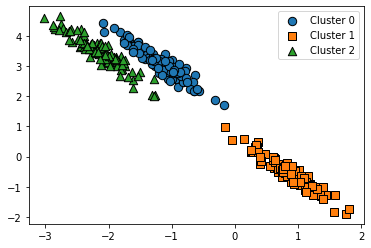

In [42]:
from sklearn.datasets import make_blobs

# make_blobs로 300개 데이터 세트, 3개 군집 세트, cluster_std=0.5
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, cluster_std = 0.5, random_state = 0)

# 길게 늘어난 타원형 데이터 세트를 생성하기 위해 변형하기
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85283229]]
X_ansio = np.dot(X, transformation)

# feature 데이터 세트와 make_blob의 y 결과값을 데이터프레임으로 저장하기
clusterDF = pd.DataFrame(data = X_ansio, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화하기
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

> 위와 같은 데이터 세트에서 KMeans가 어떻게 군집화하는지 확인해보자.

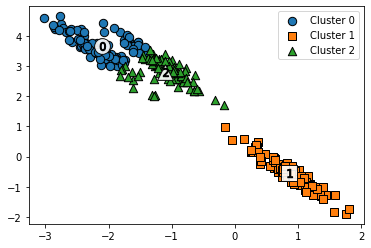

In [46]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state = 0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter = True)

  - KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있다.
  - 위와 같이 길쭉한 방향으로 데이터가 밀집해 있을 경우에는 최적의 군집화가 어렵다.

> 다음으로 GMM 기반 군집화를 수행해보자.

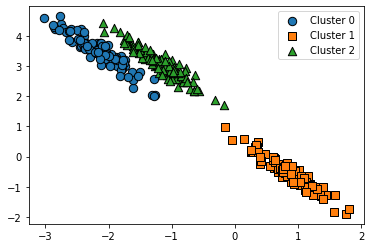

In [47]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter = False)

  - 데이터가 분포된 방향에 따라 정확하게 군집화되었다.

> make_blobs()의 target 값과 KMeans, GMM의 군집 label 값을 서로 비교해 위와 같은 데이터 세트에서 얼마만큼의 군집화 효율 차이가 발생하는지 확인해보자.

In [48]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print(']n ### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64
]n ### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


  - KMeans의 경우 군집 1번만 정확히 매핑되었지만, GMM의 경우는 군집이 target과 정확하게 잘 매핑되었다.

---

### **05. DBSCAN**

#### a. DBSCAN 개요
  - 정의
    - 밀도 기반 군집화의 대표적인 알고리즘
    
  - 장점
    - 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능
    - 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행함

  - 주요 파라미터
    - 입실론 주변 영역(epsilon)
      - 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
    - 최소 데이터 개수(min points)
      - 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

  - 데이터 포인트
    - 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의함
    - 핵심 포인트(Core point)
      - 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우, 해당 데이터를 핵심 포인트라고 함
    - 이웃 포인트(Neighbor point)
      - 주변 영역 내에 위치한 타 데이터
    - 경계 포인트(Border point)
      - 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
    - 잡음 포인트(Noise point)
      - 최소 데이터 개수 이상의 아웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트도 가지고 있지 않은 데이터
  
  - `DBSCAN` 클래스
    - 주요 파라미터
      - `eps`: 입실론 주변 영역의 반경
      - `min_samples`: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수


#### b. DBSCAN 적용하기 - 붓꽃 데이터 세트

In [49]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target

In [51]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


  - -1이 군집 레이블로 있는데, 이는 노이즈에 속하는 군집을 의미한다.
  - 따라서 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화되었다.

> DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 visualize_cluster_plot() 함수를 이용해 시각화해보자.

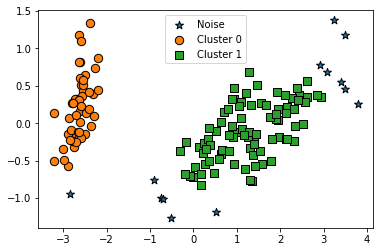

In [52]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components = 2로 피처 데이터 세트 변환
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

  - 별표로 표현된 값은 모두 노이즈이다. PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러나는 것을 확인할 수 있다.

> eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다. 이를 확인해보자.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


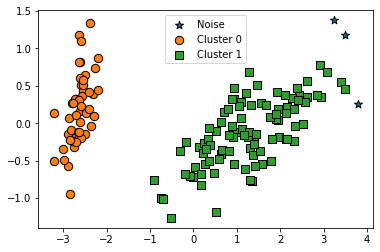

In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

  - 노이즈 군집인 -1이 3개밖에 없다. 기존에 eps가 0.6일 때 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 Cluster 1에 소속되었다.

> 이번에는 eps를 기존 0.6으로 유지하고, min_samples를 16으로 늘려보자.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


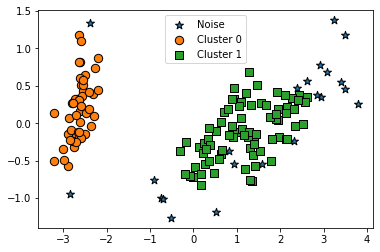

In [56]:
dbscan = DBSCAN(eps = 0.6, min_samples = 16, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

  - 노이즈 데이터가 기존보다 많이 증가했다.

#### c. DBSCAN 적용하기 - make_circles() 데이터 세트

> 이번에는 복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교해보자. 

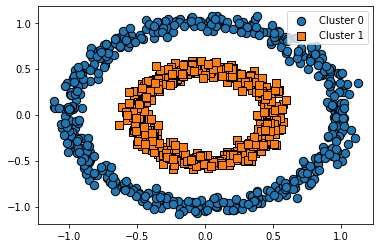

In [57]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

> 먼저 K-평균으로 make_circles() 데이터 세트를 군집화해보자. 

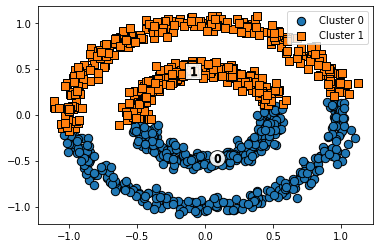

In [58]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter = True)

  - 위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화되었다. 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.

> 다음으로는 GMM을 적용해보자.

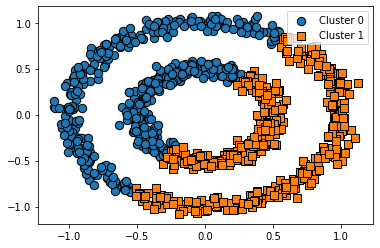

In [59]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter = False)

  - 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았다.

> 이제 DBSCAN으로 군집화를 적용해보자.

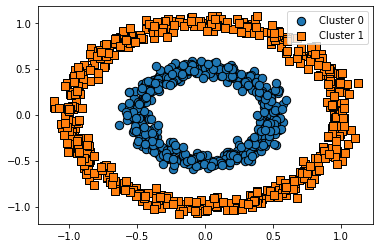

In [60]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)

  - DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화가 됐음을 알 수 있다.